In [2]:
import numpy as np
from ipywidgets import widgets
from IPython.display import display, SVG, clear_output

import radio_screen as scrn

PRIME = [11, 13, 19]
OFFSET = [3, -2, 1]

knob = [-OFFSET[i] / PRIME[i] for i in range(len(PRIME))]
start_val = 0
for i in knob: 
    start_val += i

knob1 = widgets.IntSlider(value = 0, min = -6, max = 6, description = "11")
knob2 = widgets.IntSlider(value = 0, min = -6, max = 6, description = "13")
knob3 = widgets.IntSlider(value = 0, min = -6, max = 6, description = "19")

out = widgets.FloatRangeSlider(value = [start_val, 0], min = -1.0, max = 1.0, steps = 0.0001, disabled = True)

screen = widgets.Output()

    

def draw_screen(): 
    ttl = 0
    for y in knob: 
        ttl += y
    cycle = 0
    if(ttl < 0): 
        cycle = -(1 / ttl) * 0.1
    elif(ttl > 0):
        cycle = 1 / ttl * 0.1
    else: 
        cycle = ttl
    scrn.make_file("screen", 200, 300, ttl, cycle)
    with screen: 
        clear_output(wait = True)
        display(SVG("screen.svg"))

def gen_hand(changes, foo): 
    x = (changes["new"] - OFFSET[foo]) / PRIME[foo]
    knob[foo] = x
    ttl = 0
    for y in knob: 
        ttl += y
    if(ttl < 0): 
        out.value = [ttl, 0]
    else: 
        out.value = [0, ttl]
    draw_screen()
    
def hand_1(changes): 
    gen_hand(changes, 0)
    
def hand_2(changes): 
    gen_hand(changes, 1)

def hand_3(changes): 
    gen_hand(changes, 2)



knob1.observe(hand_1, names = "value")
knob2.observe(hand_2, names = "value")
knob3.observe(hand_3, names = "value")

draw_screen() 

controls = widgets.VBox([knob1, knob2, knob3, out])
game = widgets.HBox([controls, screen])
display(game)



In [3]:
import numpy as np
from ipywidgets import widgets
from IPython.display import display, SVG, clear_output

import radio_screen as scrn

PRIME = [11, 13, 19]
OFFSET = [3, -2, 1]

knob = [-OFFSET[i] / PRIME[i] for i in range(len(PRIME))]
start_val = 0
for i in knob: 
    start_val += i

knob1 = widgets.IntSlider(value = 0, min = -6, max = 6, description = "11")
knob2 = widgets.IntSlider(value = 0, min = -6, max = 6, description = "13")
knob3 = widgets.IntSlider(value = 0, min = -6, max = 6, description = "19")

out = widgets.FloatRangeSlider(value = [start_val, 0], min = -1.0, max = 1.0, steps = 0.0001, disabled = True)

screen = widgets.Output()

    

def draw_screen(): 
    ttl = 0
    for y in knob: 
        ttl += y
    cycle = 0
    if(ttl < 0): 
        cycle = -(1 / ttl) * 0.1
    elif(ttl > 0):
        cycle = 1 / ttl * 0.1
    else: 
        cycle = ttl
    scrn.make_file("screen", 200, 300, ttl, cycle)
    with screen: 
        clear_output(wait = True)
        display(SVG("screen.svg"))

def gen_hand(changes, foo): 
    x = (changes["new"] - OFFSET[foo]) / PRIME[foo]
    knob[foo] = x
    ttl = 0
    for y in knob: 
        ttl += y
    if(ttl < 0): 
        out.value = [ttl, 0]
    else: 
        out.value = [0, ttl]
    draw_screen()
    
def hand_1(changes): 
    gen_hand(changes, 0)
    
def hand_2(changes): 
    gen_hand(changes, 1)

def hand_3(changes): 
    gen_hand(changes, 2)



knob1.observe(hand_1, names = "value")
knob2.observe(hand_2, names = "value")
knob3.observe(hand_3, names = "value")

draw_screen() 

controls = widgets.VBox([knob1, knob2, knob3, out])
game = widgets.HBox([controls, screen])
display(game)



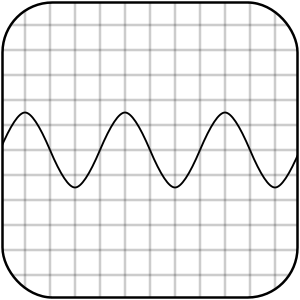

In [4]:
import numpy as np
from IPython.display import SVG, display

PLOT_WD = 2400
PLOT_HT = 2400
WLEN = 200
AMP = 300


svg_header = "<?xml version=\"1.0\" ?>\n" +\
            "<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" \n" +\
            "width=\"300\" height=\"300\" " +\
            "viewBox=\"0 0 {} {}\" ".format(PLOT_WD, PLOT_HT) +\
            ">\n\n"
            
svg_footer = "\n\n</svg>\n"

#file = open("test.svg", "w")

def make_defs(wlen, amp): 
    
    ctr = PLOT_HT / 2
    stroke = 15

    curve_str = ""

    x = [(j) * wlen for j in range(5)]
    dx = 2 * wlen / (np.pi)

    curve_str += "<defs>\n" 
    curve_str += "\t<g id=\"sine\" stroke=\"black\" "
    curve_str += "stroke-width=\"{}\" ".format(stroke)
    curve_str += "fill=\"none\" >\n"

    curve_str += "\t\t<path d=\"M {},{} Q {},{} {},{}\" />\n".format(x[0],
                                                             amp, 
                                                             x[0] + dx,
                                                             0, 
                                                             x[0] + wlen,
                                                             0)
    curve_str += "\t\t<path d=\"M {},{} Q {},{} {},{}\" />\n".format(x[1], 
                                                                 0, 
                                                                 x[2] - dx, 
                                                                 0, 
                                                                 x[2], 
                                                                 amp)

    curve_str += "\t\t<path d=\"M {},{} Q {},{} {},{}\" />\n".format(x[2], 
                                                                amp, 
                                                                x[2] + dx, 
                                                                2 * amp, 
                                                                x[3], 
                                                                2 * amp)
    curve_str += "\t\t<path d=\"M {},{} Q {},{} {},{}\" />\n".format(x[3], 
                                                            2 * amp, 
                                                            x[4] - dx,  
                                                            2 * amp, 
                                                            x[4], 
                                                            amp)
    curve_str += "\t</g>\n\n"
    curve_str += "\t<clipPath id=\"screenclip\" >\n"
    curve_str += "\t\t<rect x=\"20\" y=\"20\" height=\"{}\" rx=\"400\" ".format(2360)
    curve_str += "width=\"{}\" />\n".format(2360)
    curve_str += "\t</clipPath>\n\n"
    curve_str += "</defs>\n\n"
    return curve_str

def make_curve(wlen, amp, direction, cycle): 
    curve_str = ""
    curve_str = "<g style=\"clip-path: url(#screenclip)\" >\n"
    for i in range((PLOT_WD // (4 * wlen)) + 4): 
        curve_str += "\t<use xlink:href=\"#sine\" x=\"{}\" y=\"{}\" >\n".format((i - 1) * 4 * wlen, 
                                                                              (PLOT_HT / 2) - amp)
        if(direction != 0): 
            if(direction < 0): 
                i_1 = i - 2
            else: 
                i_1 = i
            curve_str += "\t\t<animate\n"
            curve_str += "\t\t\tattributeName=\"x\" \n"
            curve_str += "\t\t\tfrom=\"{}\" \n".format((i - 1) * 4 * wlen)
            curve_str += "\t\t\tto=\"{}\" \n".format(i_1 * 4 * wlen)
            curve_str += "\t\t\tbegin=\"0s\" \n"
            curve_str += "\t\t\tdur=\"{}s\" \n".format(cycle)
            curve_str += "\t\t\trepeatCount=\"indefinite\" \n" 
            curve_str += "\t\t/>\n"
        curve_str += "\t</use>\n\n"
    curve_str += "</g>\n\n"
    return curve_str

def draw_screen(): 
    markup = ""
    markup += "<g id=\"screen\" >\n" 
    markup += "\t<rect x=\"20\" y=\"20\" \n"
    markup += "\t\theight=\"{}\" ".format(2360)
    markup += "width=\"{}\" \n".format(2360)
    markup += "\t\trx=\"{}\" \n".format(400)
    markup += "\t\tstroke=\"black\" stroke-width=\"20\" fill=\"none\" \n"
    markup += "\t/>\n\n"
    
    markup += "\t<g id=\"grid\" style=\"\n"
    markup += "\t\tclip-path: url(#screenclip); \n"
    markup += "\t\tstroke: rgba(0, 0, 0, 0.2); \n"
    markup += "\t\tstroke-width: 20; \n"
    markup += "\t\tfill: none\" \n"
    markup += "\t>\n"
    for ix in range(1, 12): 
        markup += "\t\t<path d=\"M {},0 V {}\" />\n".format(ix * 200, PLOT_WD)
    for iy in range(1, 12): 
        markup += "\t\t<path d=\"M 0,{} H {}\" />\n".format(iy * 200, PLOT_HT)
    markup += "\t</g>\n"
    markup += "</g>\n\n"
    return markup

def make_file(fname, wlen, amp, direction, cycle): 
    file = open(fname + ".svg", "w")
    file.write(svg_header)
    file.write(make_defs(wlen, amp))
    file.write(make_curve(wlen, amp, direction, cycle))
    file.write(draw_screen())
    file.write(svg_footer)
    file.close()
    
make_file("testing", WLEN, AMP, -1, 10/10)

display(SVG("testing.svg"))



In [5]:
import numpy as np
import radio_screen as scrn
from ipywidgets import widgets
from IPython.display import display, clear_output, SVG


